In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import (linspace, sin, cos, pi)
from numpy.fft import rfft, rfftfreq
from sklearn.decomposition import FastICA

In [2]:
x = linspace(0, 3000, 3000)  # возвращает равномерно распределённые числа в данном интервале

a0 = 1
a1 = 0.75
a2 = 1.5
w0 = 0.015
w1 = 0.0172
w2 = 0.002

data_1 = (np.random.random(1000))

# T= 2*pi
f1 = a0*sin(2 * pi * w0 * x + 2 * pi * 0.00) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.00) + a2*cos(2 * pi * w2 * x + 2 * pi * 0.00) + [1*x for x in np.random.random(3000)]
f2 = a0*sin(2 * pi * w0 * x + 2 * pi * 0.00425) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.00425) + a2*cos(2 * pi * w2 * x + 2 * pi * 0.00425) + [x for x in np.random.random(3000)]
f3 = a0*sin(2 * pi * w0 * x + 2 * pi * 0.0085) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.0085) + a2*cos(2 * pi * w2 * x + 2 * pi * 0.0085) + [x for x in np.random.random(3000)]
f4 = a0*sin(2 * pi * w0 * x + 2 * pi * 0.01275) + a1*sin(2 * pi * w1 * x + 2 * pi * 0.01275) + a2*cos(2 * pi * w2 * x + 2 * pi * 0.01275) + [x for x in np.random.random(3000)]


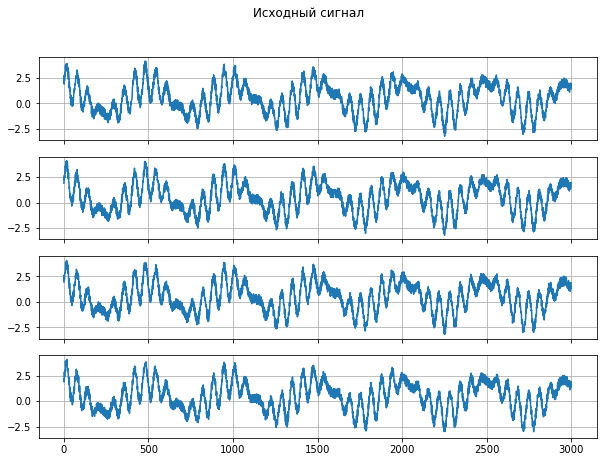

In [3]:
nrows, ncols = 4, 1
figsize = [10, 7]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True, sharey=True)
fig.suptitle('Исходный сигнал')
ax[0].plot(x, f1)
ax[0].grid(True)
ax[1].plot(x, f2)
ax[1].grid(True)
ax[2].plot(x, f3)
ax[2].grid(True)
ax[3].plot(x, f4)
ax[3].grid(True)

plt.show()


In [8]:
Mas = np.c_[f1, f2, f3, f4]
ica = FastICA(n_components=3)
S_ = ica.fit_transform(Mas)

spectrf = rfft(Mas - np.mean(Mas)) / (len(x))
nu = rfftfreq(3000, 1.)


(3000,)


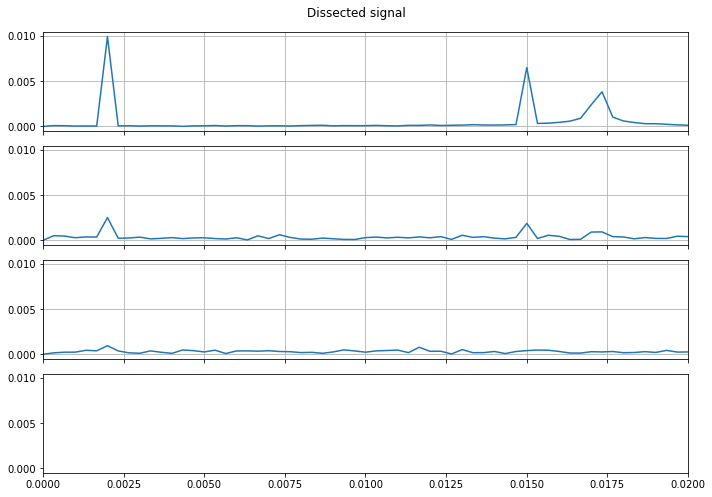

In [9]:
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True, sharey=True)
fig.suptitle('Dissected signal')
print(S_[:, 1].shape)
for i in range(S_.shape[1]):
    spectrf = rfft(S_[:, i] - np.mean(S_[:, i])) / (len(S_[:, i]))
    ax[i].plot(nu, np.abs(spectrf))
    ax[i].grid(True)


axes = plt.gca()
axes.set_xlim([0.0, 0.02])
plt.tight_layout()
plt.show()